<a href="https://colab.research.google.com/github/waleogundeji/personal/blob/main/Water_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset from the local drive

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Phytoplankton_results.csv to Phytoplankton_results (12).csv


# Read the datset in csv format with pandas

In [ ]:
phyto = pd.read_csv('Phytoplankton_results.csv')
phyto.shape

(882, 16)

# Create a new header for the dataset by specify the column to use as header

In [ ]:
new_header = phyto.iloc[0] #grab the first row for the header
phyto = phyto[1:] #take the data less the header row
phyto.columns = new_header #set the header row as the df header
phyto = phyto[:828]

# Data cleaning

### Four independent features are selected for cleaning. Missing and not detected values were replaced, and the errors were cast

In [ ]:
def clean_data(phyto):
 phyto["Alexandrium spp. \ncells L-1\n(PSP)"] = phyto["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0)
 phyto["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = phyto["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0)
 phyto["Dinophysiaceae \ncells L-1\n(DSP)"] = phyto["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0)
 phyto["Prorocentrum lima \ncells L-1\n(DSP)"] = phyto["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0)

 phyto["Alexandrium spp. \ncells L-1\n(PSP)"] = pd.to_numeric(phyto["Alexandrium spp. \ncells L-1\n(PSP)"], errors='coerce')
 phyto["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(phyto["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce')
 phyto["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(phyto["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce')
 phyto["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(phyto["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce')
    
 phyto["Alexandrium spp. \ncells L-1\n(PSP)"] = phyto["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1)
 phyto["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = phyto["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1)
 phyto["Dinophysiaceae \ncells L-1\n(DSP)"] = phyto["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1)
 phyto["Prorocentrum lima \ncells L-1\n(DSP)"] = phyto["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)
    

clean_data(phyto)
phyto


,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,44200.4583333333,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,44200.3541666667,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,44201.4375,0.0,0.0,0.0,400.0,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,44201.4583333333,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,44202.4375,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,44494.3472222222,0.0,40.0,0.0,7080.0,ND,ND,ND,NaN,NaN
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,44495.4895833333,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,44494.6736111111,0.0,40.0,0.0,0.0,ND,ND,ND,NaN,NaN
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,44496.625,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN


# Data labelling

### A dictionary was created to map the each column to a threshold. A thresold reach is created for each of the feature and add to the dataframe as the target feature

In [ ]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100,
              "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}

In [ ]:
def check_thresholds(phyto):
    t = []
    for i,j in enumerate(phyto["Sample number"]):
        alexandrium = phyto.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]
        pseudo_nitzschia = phyto.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = phyto.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = phyto.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]

        threshold_reached = 0
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
             threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:
            threshold_reached = 1

        t.append(threshold_reached)

    return t



thresholds_reached = check_thresholds(phyto)
phyto['thresholds_reached'] = thresholds_reached
pd.DataFrame.to_csv(phyto, 'thresholds_cleaned.csv', sep=',', index=False)

## The dataset is divided into dependent (y) and independent (x) variables

In [ ]:
x = pd.read_csv('thresholds_cleaned.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ",
                                                   "Dinophysiaceae \ncells L-1\n(DSP)", 
                                                   "Prorocentrum lima \ncells L-1\n(DSP)", 
                                                   "Alexandrium spp. \ncells L-1\n(PSP)"], 
                na_values = ['no info', '.'])

y = pd.read_csv('thresholds_cleaned.csv', usecols=["thresholds_reached"])

## The independent (x) and dependent (y) variables are split into training and test data

## Feature scaling was done to standardized the data

In [ ]:
## Splitting the dataset into the Training and Test test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

## Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Modelling

### import necessay library
### Define the model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [ ]:
# Modelling
model = Sequential()
model.add(Dense(units = 500, activation = 'relu', input_shape = (4,)))
model.add(Dropout(0.4))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               2500      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                25050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 27,601
Trainable params: 27,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 20, verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
21/21 [==============================] - 1s 16ms/step - loss: 0.2344 - accuracy: 0.9622 - val_loss: 0.1432 - val_accuracy: 0.9699
Epoch 2/20
21/21 [==============================] - 0s 5ms/step - loss: 0.1446 - accuracy: 0.9789 - val_loss: 0.1231 - val_accuracy: 0.9940
Epoch 3/20
21/21 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.9879 - val_loss: 0.1131 - val_accuracy: 0.9940
Epoch 4/20
21/21 [==============================] - 0s 5ms/step - loss: 0.1297 - accuracy: 0.9879 - val_loss: 0.1097 - val_accuracy: 0.9940
Epoch 5/20
21/21 [==============================] - 0s 5ms/step - loss: 0.1303 - accuracy: 0.9879 - val_loss: 0.1058 - val_accuracy: 0.9940
Epoch 6/20
21/21 [==============================] - 0s 5ms/step - loss: 0.1278 - accuracy: 0.9894 - val_loss: 0.0938 - val_accuracy: 0.9940
Epoch 7/20
21/21 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.9864 - val_loss: 0.1071 - val_accuracy: 0.9880
Epoch 8/20
21/21 [=

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

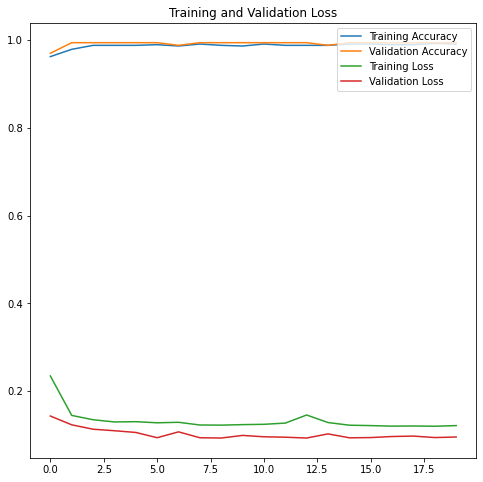

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()


### Augmentation of Data size

In [ ]:
model_pred = model.predict(x_test, batch_size=None, verbose=0, steps=None, max_queue_size=10,workers=1,use_multiprocessing=False)
model_pred

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [23.042093  ],
       [ 0.        ],
       [ 2.683865  ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.287735  ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

In [ ]:
predictions = np.zeros(len(x_test))     # Assuming no threshold reached
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y["thresholds_reached"] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y["thresholds_reached"] == 0)))

Before OverSampling, counts of label '1': 95
Before OverSampling, counts of label '0': 733 



In [ ]:
from collections import Counter
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x, y["thresholds_reached"].ravel())


In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 

After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 



In [ ]:
history = model.fit(x_train_res, y_train_res, batch_size = 32, epochs = 20, verbose = 1, validation_data = (x_test, y_test))

score_res = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_res[0])
print('Test accuracy:', score_res[1])

Epoch 1/20
46/46 [==============================] - 1s 5ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.0965 - val_accuracy: 0.9940
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.0965 - val_accuracy: 0.9940
Epoch 3/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.0965 - val_accuracy: 0.9940
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.0965 - val_accuracy: 0.9940
Epoch 5/20
46/46 [==============================] - 0s 5ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.0965 - val_accuracy: 0.9940
Epoch 6/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.0965 - val_accuracy: 0.9940
Epoch 7/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.0965 - val_accuracy: 0.9940
Epoch 8/20
46/46 [==

In [ ]:
acc_res = history.history['accuracy']
val_acc_res = history.history['val_accuracy']

loss_res = history.history['loss']
val_loss_res = history.history['val_loss']

epochs_range = range(20)

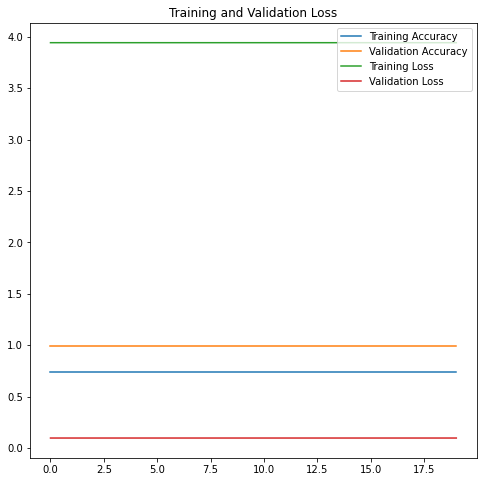

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc_res, label='Training Accuracy')
plt.plot(epochs_range, val_acc_res, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss_res, label='Training Loss')
plt.plot(epochs_range, val_loss_res, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

# Data Visualisation

0                                          Alexandrium spp. \ncells L-1\n(PSP)  ...  thresholds_reached
0                                                                               ...                    
Alexandrium spp. \ncells L-1\n(PSP)                                   1.000000  ...            0.455902
Dinophysiaceae \ncells L-1\n(DSP)                                     0.055174  ...            0.461656
Prorocentrum lima \ncells L-1\n(DSP)                                 -0.008287  ...            0.140486
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                              0.019008  ...            0.258077
NaN                                                                        NaN  ...                 NaN
NaN                                                                        NaN  ...                 NaN
thresholds_reached                                                    0.455902  ...            1.000000

[7 rows x 7 columns]


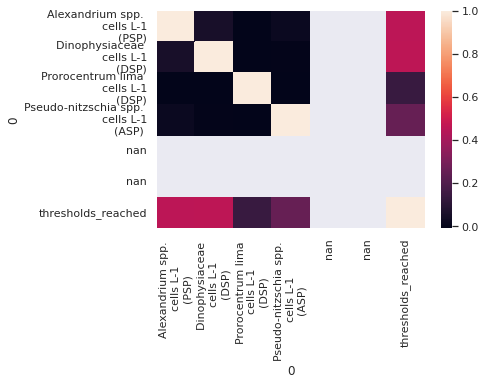

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
corrMatrix = phyto.corr()
print (corrMatrix)
ax = sns.heatmap(corrMatrix)